# Exercise 5

The conceptual content of this exercise consists of two parts: 

1. First, you'll learn how to calculate absorption spectra from the field-inducted polarization of a sample. 

2. Second, you'll examine how the absorption spectrum changes in response to factors like temperature and viscosity. 

As input for these calculations, you'll use simulation data you saved using the main LangevinAbsorption app. For each question, you'll need to run a simulation and import the correct data into your code. The first section below walks you through this process step by step. The second section directs you to run specific simulations, import the corresponding data, and answer questions based on your calculations with that data. 

## Step-by-step Absorption Spectrum Calculation

This section walks through an absorption spectrum calculation step-by-step. After each instruction, type the necessary code directly into the corresponding cell and execute it. If there's an error in one of the cells *fix it before you move to the next step!*

0. First run a simulation using the main LangevinAbsorption app. A text file containing a time axis, a field trajectory, and a polarization trajectory will be automatically saved for you in your local MolSpec directory. A good set of input parameters for this simulation would be to run a simulation with 200 molecules, $t_{max} = 10$ ps, and $\nu_{pulse}$ = 50 THz. (You don't need any code for this step -- just run the simulation and make note of the file name). 

1. Use `dat = np.loadtxt()` to load your data (inserting the correct file name into the argument for loadtxt). 


2. Define the variables `taxis`, `Efield`, and `Pol` from the data in your `dat` matrix. The first column in `dat` will be the time axis, the second column the electric field, and the third column the polarization. E.g.: <br><br>`taxis = dat[:,0]`<br><br>`Efield = dat[:,1]`<br><br>`Pol = dat[:,2]`<br><br>Plot both the field and the polarization (using the correct time axis). Be sure to use `plt.show()` after you enter your plotting commands so that these plots will be rendered separately from any later plots you generate. 

3. Calculate the Fourier transform of the polarization and the electric field using the `np.fft.ifft()` method. Take note! We're using here the NumPy **inverse** FFT algorithm (`np.fft.ifft()`) rather than the **forward** FT algorithm (`np.fft.fft()`) because NumPy uses the *opposite sign convention* in its FT calculations than in our lectures! Whereas we define the *forward* transform as $$ \tilde f(\omega) = \int dt\; f(t) \; e^{i\omega t},$$ and the *inverse* transform as $$f(t)= \int d\omega \; \tilde f(\omega) \; e^{-i\omega t},$$ NumPy *reverses the sign conventions in the exponents*. By using the `np.fft.ifft()` algorithm for *forward* transforms and the `np.fft.fft()` algorithm for *inverse* transforms, we match the convention in the lecture notes. 

4. Define an appropriate frequency axis (in units of THz) using `np.fft.fftfreq()` and the step size in your taxis variable. 


5. Identify *which two indices* `ndx1` *and* `ndx2` *in your frequency axis* correspond to the two frequencies `f1 = ` 45 THz and `f2 = ` 55 THz. One way to do this is to use the `np.argmin()` function. For example, to find the index in `faxis` whose entry is closest to `f1`, you can write <br><br>`ndx1 = np.argmin(np.abs(faxis-f1))`.<br><br> The ``np.argmin`` function finds the *index* of the smallest entry in a give vector; by passing it the vector `np.abs(faxis-f1)` we find the index in `faxis` whose value is closest to `f1`. 

6. Calculate the **linear susceptibility** $\chi^{(1)}$ using the formula $$\chi^{(1)}(\omega) = \frac{\tilde P(\omega)}{\tilde E(\omega)}$$ from lecture.$\dagger$ To avoid numerical instability, restrict the range of values for which $\chi^{(1)}(\omega)$ is calculated to be between the limits `f1` and `f2`. (If we try to include frequencies where the electric field $\tilde E(\omega)$ is close to zero, we'll get numerical instability due to almost-zero values in the denominator of the equation.) 

$\dagger$ Note that this relation holds *only* in the linear response regime! As it turns out, because our system consists only of harmonic oscillators, it is *always* in the linear respons regime -- harmonic oscillators have no nonlinear response! But even for anharmonic systems the expression would be valid so long as we keep our field intensity low enough. 

7. Calculate and plot the absorption spectrum using the formula $$A(\omega) = \text{Im } \chi^{(1)}(\omega)$$ from lecture. (You can ignore the additional terms in the expression that leave the line shape essentially unchanged.)

## Homework Questions

Once you've completed the steps above to calculate an absorption spectrum, copy and paste all your code (from each individual code blocke) into each of the **single code blocks** below. Run simulations with the parameters specified (using a distinct file name for each), import your data, plot the polarization and absorption spectra, and answer the questions below. 

Unless otherwise noted, use the following parameters for your simulations:
* At least 200 molecules. (You may want to increase this further if there's too much noise in the data.)
* $t_{max} = 10$ ps.
* $\nu_{pulse}$ = 50 THz
and all other parameters set to their default values. 

### Question 1.

First run a simulation in the low-temperature limit (i.e., with $T = 0$ K) and $\gamma$ = 10 pg/s. In this simulation, what causes the Polarization to decay? 


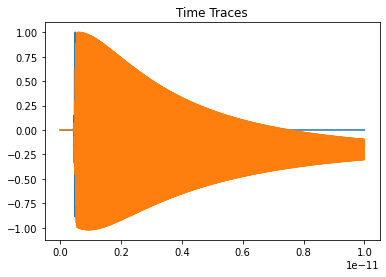

480
480


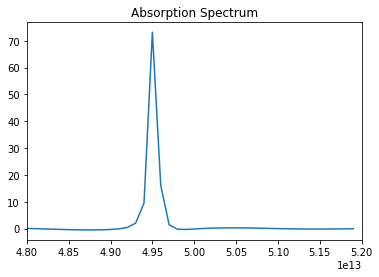

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

dat = np.loadtxt("../../../../local/" + 'T0_g10.txt')
taxis = dat[:,0]
Efield = dat[:,1] 
Pol = dat[:,2] 
plt.title('Time Traces')
plt.plot(taxis, Efield)
plt.plot(taxis, Pol)
plt.show()

faxis = np.fft.fftfreq(len(taxis), taxis[1] - taxis[0])
f1 = 48.0e+12
f2 = 52.0e+12
ndx1 = np.where(np.min(np.abs(faxis-f1))==np.abs(faxis-f1))[0][0]
print(ndx1)
print(np.argmin(np.abs(faxis-f1)))
ndx2 = np.where(np.min(np.abs(faxis-f2))==np.abs(faxis-f2))[0][0]

fE = np.fft.ifft(Efield)
fP = np.fft.ifft(Pol)
chi1 = fP[ndx1:ndx2] / fE[ndx1:ndx2]

plt.title('Absorption Spectrum')
plt.plot(faxis[ndx1:ndx2], np.imag(chi1))
plt.xlim(f1,f2)
plt.show()


### Question 2. 

Now repeat the last simulation with $\gamma$ increased to 100 pg/s. How does the polarization time trace change? How is this reflected in the absorption spectrum? 

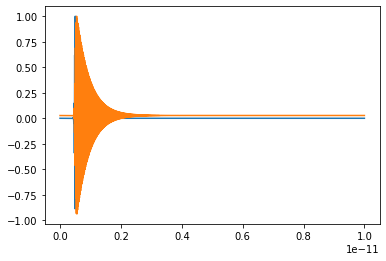

480
480


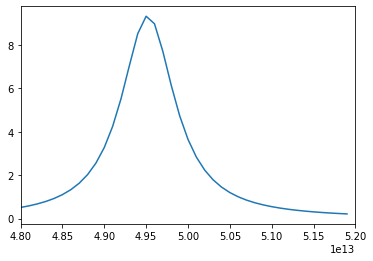

In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

dat = np.loadtxt("../../../../local/" + 'T0_g100.txt')
taxis = dat[:,0]
Efield = dat[:,1] 
Pol = dat[:,2] 
plt.title('Time Traces')
plt.plot(taxis, Efield)
plt.plot(taxis, Pol)
plt.show()

faxis = np.fft.fftfreq(len(taxis), taxis[1] - taxis[0])
f1 = 48.0e+12
f2 = 52.0e+12
ndx1 = np.where(np.min(np.abs(faxis-f1))==np.abs(faxis-f1))[0][0]
print(ndx1)
print(np.argmin(np.abs(faxis-f1)))
ndx2 = np.where(np.min(np.abs(faxis-f2))==np.abs(faxis-f2))[0][0]

fE = np.fft.ifft(Efield)
fP = np.fft.ifft(Pol)
chi1 = fP[ndx1:ndx2] / fE[ndx1:ndx2]

plt.title('Absorption Spectrum')
plt.plot(faxis[ndx1:ndx2], np.imag(chi1))
plt.xlim(f1,f2)
plt.show()

### Question 3

Now set $\gamma$ back to 10 pg/s and increase the temperature to 100 K. How does the polarization trace and absorption spectrum compare to the $T = 0K$ / $\gamma = 10$ pg/s case? Why do you think this is? 

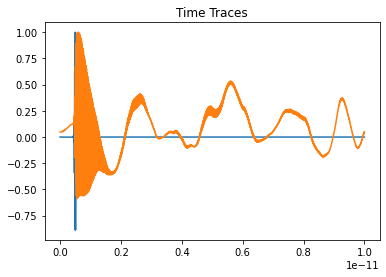

480
480


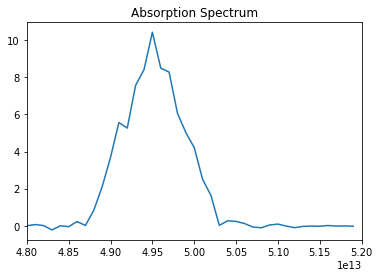

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

dat = np.loadtxt("../../../../local/" + 'T100_g10.txt')
taxis = dat[:,0]
Efield = dat[:,1] 
Pol = dat[:,2] 
plt.title('Time Traces')
plt.plot(taxis, Efield)
plt.plot(taxis, Pol)
plt.show()

faxis = np.fft.fftfreq(len(taxis), taxis[1] - taxis[0])
f1 = 48.0e+12
f2 = 52.0e+12
ndx1 = np.where(np.min(np.abs(faxis-f1))==np.abs(faxis-f1))[0][0]
print(ndx1)
print(np.argmin(np.abs(faxis-f1)))
ndx2 = np.where(np.min(np.abs(faxis-f2))==np.abs(faxis-f2))[0][0]

fE = np.fft.ifft(Efield)
fP = np.fft.ifft(Pol)
chi1 = fP[ndx1:ndx2] / fE[ndx1:ndx2]

plt.title('Absorption Spectrum')
plt.plot(faxis[ndx1:ndx2], np.imag(chi1))
plt.xlim(f1,f2)
plt.show()

### Question 4.

Now repeat the last simulation with $\nu_{pulse}$ = 30 THz. What happens to the quality of the absorption spectrum? Why did this happen? What does this tell you about *experimental* absorption spectroscopy measurements? 

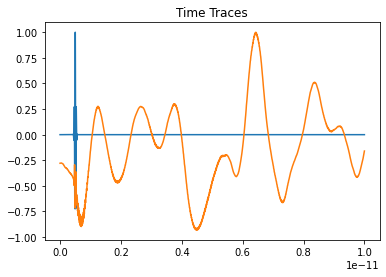

480
480


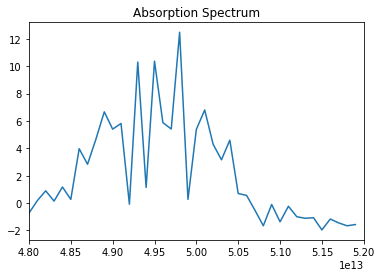

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

dat = np.loadtxt("../../../../local/" + 'T100_g10_v30.txt')
taxis = dat[:,0]
Efield = dat[:,1] 
Pol = dat[:,2] 
plt.title('Time Traces')
plt.plot(taxis, Efield)
plt.plot(taxis, Pol)
plt.show()

faxis = np.fft.fftfreq(len(taxis), taxis[1] - taxis[0])
f1 = 48.0e+12
f2 = 52.0e+12
ndx1 = np.where(np.min(np.abs(faxis-f1))==np.abs(faxis-f1))[0][0]
print(ndx1)
print(np.argmin(np.abs(faxis-f1)))
ndx2 = np.where(np.min(np.abs(faxis-f2))==np.abs(faxis-f2))[0][0]

fE = np.fft.ifft(Efield)
fP = np.fft.ifft(Pol)
chi1 = fP[ndx1:ndx2] / fE[ndx1:ndx2]

plt.title('Absorption Spectrum')
plt.plot(faxis[ndx1:ndx2], np.imag(chi1))
plt.xlim(f1,f2)
plt.show()